# 05 Análisis de Relación entre Pesos de Género y Índice de Kothari (Controlando por Peso de Empresa)

Objetivo del Notebook: Analizar si existen diferencias significativas en las variables de peso de género (representación de mujeres en directorios y ejecutivos) con respecto al índice de devengos discrecionales de Kothari, **controlando por el efecto del peso de empresa**.

En el notebook anterior (04), se encontró que el peso de empresa tiene un efecto significativo según la correlación de Spearman. Este notebook busca determinar si las variables de género tienen un efecto independiente una vez que se controla por el tamaño de la empresa.

## Carga de datos y configuración inicial

In [3]:
# Cargar la sesión de Kedro
%load_ext kedro.ipython
%reload_kedro

[11/04/25 22:01:41] INFO     Using                                                                  ]8;id=515727;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=954459;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py#272\272]8;;\
                             '/home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/                
                             kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/f                
                             ramework/project/rich_logging.yml' as logging configuration.                          

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=458801;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=804206;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=766202;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=165292;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=978163;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=192278;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/k                
                             otari-gender-data-analysis.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/04/25 22:01:42] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=932798;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=423794;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/04/25 22:01:47] INFO     Kedro project kotari-gender-data-analysis                              ]8;id=467439;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=995863;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=317662;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=856697;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=663786;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=367289;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#153\153]8;;\

                    INFO     Resolved project path as:                                              ]8;id=334197;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=664114;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/k                
                             otari-gender-data-analysis.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/04/25 22:01:48] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=621171;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=229336;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project kotari-gender-data-analysis                              ]8;id=655861;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=469407;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=93835;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=958666;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=799964;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=368174;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configurar el estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [5]:
# Cargar el dataset de análisis generado en el notebook 03
df_analysis = catalog.load("kothari_analysis_data")
print(f"Dataset cargado con {df_analysis.shape[0]} filas y {df_analysis.shape[1]} columnas")
print(f"\nColumnas disponibles:")
print(df_analysis.columns.tolist())
print(f"\nEmpresas únicas: {df_analysis['EMPRESA'].nunique()}")
print(f"Años cubiertos: {sorted(df_analysis['ANIO'].unique())}")

[11/04/25 22:01:57] INFO     Loading data from kothari_analysis_data (ParquetDataset)...        ]8;id=707741;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=185524;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#403\403]8;;\

Dataset cargado con 158 filas y 12 columnas

Columnas disponibles:
['EMPRESA', 'ANIO', 'Y', 'X1', 'X2', 'X3', 'X4', 'Y_predicho', 'KOTHARI_INDEX', 'peso_empresa', 'peso_muj_dir', 'peso_muj_ejec']

Empresas únicas: 16
Años cubiertos: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


## Estadísticas Descriptivas de Variables

In [6]:
# Estadísticas descriptivas de todas las variables relevantes
print("Estadísticas Descriptivas de Variables:")
print("\n1. Peso de Empresa (% de activos totales):")
print(df_analysis['peso_empresa'].describe())

print("\n2. Peso de Mujeres en Directorios (% de directorios con mujeres):")
print(df_analysis['peso_muj_dir'].describe())

print("\n3. Peso de Mujeres Ejecutivas (% de ejecutivos que son mujeres):")
print(df_analysis['peso_muj_ejec'].describe())

print("\n4. Índice de Kothari (Devengos Discrecionales):")
print(df_analysis['KOTHARI_INDEX'].describe())

Estadísticas Descriptivas de Variables:

1. Peso de Empresa (% de activos totales):
count    158.000000
mean       5.957640
std       10.476870
min        0.322828
25%        0.537801
50%        1.289253
75%        6.299398
max       43.635394
Name: peso_empresa, dtype: float64

2. Peso de Mujeres en Directorios (% de directorios con mujeres):
count    116.000000
mean      17.555524
std       11.254423
min        2.439024
25%        8.235294
50%       15.789474
75%       29.629630
max       35.227273
Name: peso_muj_dir, dtype: float64

3. Peso de Mujeres Ejecutivas (% de ejecutivos que son mujeres):
count    147.000000
mean       7.895157
std        6.698212
min        0.000000
25%        1.666667
50%        8.411215
75%       10.526316
max       20.610687
Name: peso_muj_ejec, dtype: float64

4. Índice de Kothari (Devengos Discrecionales):
count    1.580000e+02
mean     1.405346e-18
std      1.667292e-01
min     -1.161487e+00
25%     -3.566889e-02
50%      2.875846e-02
75%      7.34845

## Análisis de Multicolinealidad

Antes de realizar el análisis controlado, verificamos si existe multicolinealidad entre las variables independientes usando el Factor de Inflación de Varianza (VIF).

In [7]:
# Preparar datos sin valores nulos
variables_predictoras = ['peso_empresa', 'peso_muj_dir', 'peso_muj_ejec']
df_vif = df_analysis[variables_predictoras + ['KOTHARI_INDEX']].dropna()

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = variables_predictoras
vif_data['VIF'] = [variance_inflation_factor(df_vif[variables_predictoras].values, i) 
                   for i in range(len(variables_predictoras))]

print("="*70)
print("FACTOR DE INFLACIÓN DE VARIANZA (VIF)")
print("="*70)
print("\nInterpretación:")
print("  VIF < 5: No hay multicolinealidad preocupante")
print("  VIF 5-10: Multicolinealidad moderada")
print("  VIF > 10: Multicolinealidad alta (problemática)")
print("\n")
display(vif_data)
print("\n" + "="*70)

FACTOR DE INFLACIÓN DE VARIANZA (VIF)

Interpretación:
  VIF < 5: No hay multicolinealidad preocupante
  VIF 5-10: Multicolinealidad moderada
  VIF > 10: Multicolinealidad alta (problemática)




,Variable,VIF
0,peso_empresa,1.065504
1,peso_muj_dir,2.310225
2,peso_muj_ejec,2.343465


## Correlaciones Parciales

Calculamos las correlaciones parciales entre las variables de género y el Índice de Kothari, controlando por el peso de empresa.

In [8]:
def correlacion_parcial(df, x, y, control):
    """
    Calcula la correlación parcial entre x e y, controlando por control.
    """
    # Eliminar valores nulos
    df_clean = df[[x, y, control]].dropna()
    
    # Regresión de x sobre control
    X_control = sm.add_constant(df_clean[control])
    model_x = sm.OLS(df_clean[x], X_control).fit()
    residuals_x = model_x.resid
    
    # Regresión de y sobre control
    model_y = sm.OLS(df_clean[y], X_control).fit()
    residuals_y = model_y.resid
    
    # Correlación entre los residuales
    corr, p_value = pearsonr(residuals_x, residuals_y)
    
    return corr, p_value, len(df_clean)

print("="*70)
print("CORRELACIONES PARCIALES (Controlando por Peso de Empresa)")
print("="*70)

correlaciones_parciales = []

# Correlación parcial: peso_muj_dir vs KOTHARI_INDEX (controlando peso_empresa)
corr, p_val, n = correlacion_parcial(df_analysis, 'peso_muj_dir', 'KOTHARI_INDEX', 'peso_empresa')
correlaciones_parciales.append({
    'Variable': 'peso_muj_dir',
    'Correlación Parcial': corr,
    'P-value': p_val,
    'N': n,
    'Significancia': 'Sí' if p_val < 0.05 else 'No'
})
print(f"\nPeso de Mujeres en Directorios (controlando peso_empresa):")
print(f"  Correlación Parcial: {corr:.6f}")
print(f"  P-value: {p_val:.6f}")
print(f"  N observaciones: {n}")
print(f"  Significancia (α=0.05): {'Sí' if p_val < 0.05 else 'No'}")

# Correlación parcial: peso_muj_ejec vs KOTHARI_INDEX (controlando peso_empresa)
corr, p_val, n = correlacion_parcial(df_analysis, 'peso_muj_ejec', 'KOTHARI_INDEX', 'peso_empresa')
correlaciones_parciales.append({
    'Variable': 'peso_muj_ejec',
    'Correlación Parcial': corr,
    'P-value': p_val,
    'N': n,
    'Significancia': 'Sí' if p_val < 0.05 else 'No'
})
print(f"\nPeso de Mujeres Ejecutivas (controlando peso_empresa):")
print(f"  Correlación Parcial: {corr:.6f}")
print(f"  P-value: {p_val:.6f}")
print(f"  N observaciones: {n}")
print(f"  Significancia (α=0.05): {'Sí' if p_val < 0.05 else 'No'}")

df_corr_parciales = pd.DataFrame(correlaciones_parciales)
print("\n" + "="*70)
display(df_corr_parciales)

CORRELACIONES PARCIALES (Controlando por Peso de Empresa)

Peso de Mujeres en Directorios (controlando peso_empresa):
  Correlación Parcial: 0.069941
  P-value: 0.455644
  N observaciones: 116
  Significancia (α=0.05): No

Peso de Mujeres Ejecutivas (controlando peso_empresa):
  Correlación Parcial: 0.051801
  P-value: 0.533209
  N observaciones: 147
  Significancia (α=0.05): No



,Variable,Correlación Parcial,P-value,N,Significancia
0,peso_muj_dir,0.069941,0.455644,116,No
1,peso_muj_ejec,0.051801,0.533209,147,No


## Modelos de Regresión Lineal Múltiple

Construimos varios modelos de regresión para evaluar el efecto de las variables de género controlando por el peso de empresa.

In [9]:
# Preparar datos para regresión
df_reg = df_analysis[['peso_empresa', 'peso_muj_dir', 'peso_muj_ejec', 'KOTHARI_INDEX']].dropna()

print("="*70)
print("MODELOS DE REGRESIÓN LINEAL MÚLTIPLE")
print("="*70)
print(f"\nObservaciones utilizadas: {len(df_reg)}")
print("\n" + "="*70)

MODELOS DE REGRESIÓN LINEAL MÚLTIPLE

Observaciones utilizadas: 116



In [10]:
# Modelo 1: Solo peso_empresa
print("\n" + "="*70)
print("MODELO 1: KOTHARI_INDEX ~ peso_empresa")
print("="*70)

X1 = sm.add_constant(df_reg['peso_empresa'])
y = df_reg['KOTHARI_INDEX']
model1 = sm.OLS(y, X1).fit()

print(model1.summary())
print(f"\nR² = {model1.rsquared:.6f}")
print(f"R² Ajustado = {model1.rsquared_adj:.6f}")


MODELO 1: KOTHARI_INDEX ~ peso_empresa
                            OLS Regression Results                            
Dep. Variable:          KOTHARI_INDEX   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.447
Date:                Tue, 04 Nov 2025   Prob (F-statistic):              0.231
Time:                        22:02:01   Log-Likelihood:                 36.117
No. Observations:                 116   AIC:                            -68.23
Df Residuals:                     114   BIC:                            -62.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const   

In [11]:
# Modelo 2: peso_empresa + peso_muj_dir
print("\n" + "="*70)
print("MODELO 2: KOTHARI_INDEX ~ peso_empresa + peso_muj_dir")
print("="*70)

X2 = sm.add_constant(df_reg[['peso_empresa', 'peso_muj_dir']])
model2 = sm.OLS(y, X2).fit()

print(model2.summary())
print(f"\nR² = {model2.rsquared:.6f}")
print(f"R² Ajustado = {model2.rsquared_adj:.6f}")
print(f"\nΔR² respecto Modelo 1 = {model2.rsquared - model1.rsquared:.6f}")


MODELO 2: KOTHARI_INDEX ~ peso_empresa + peso_muj_dir
                            OLS Regression Results                            
Dep. Variable:          KOTHARI_INDEX   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9985
Date:                Tue, 04 Nov 2025   Prob (F-statistic):              0.372
Time:                        22:02:01   Log-Likelihood:                 36.402
No. Observations:                 116   AIC:                            -66.80
Df Residuals:                     113   BIC:                            -58.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [12]:
# Modelo 3: peso_empresa + peso_muj_ejec
print("\n" + "="*70)
print("MODELO 3: KOTHARI_INDEX ~ peso_empresa + peso_muj_ejec")
print("="*70)

X3 = sm.add_constant(df_reg[['peso_empresa', 'peso_muj_ejec']])
model3 = sm.OLS(y, X3).fit()

print(model3.summary())
print(f"\nR² = {model3.rsquared:.6f}")
print(f"R² Ajustado = {model3.rsquared_adj:.6f}")
print(f"\nΔR² respecto Modelo 1 = {model3.rsquared - model1.rsquared:.6f}")


MODELO 3: KOTHARI_INDEX ~ peso_empresa + peso_muj_ejec
                            OLS Regression Results                            
Dep. Variable:          KOTHARI_INDEX   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     6.970
Date:                Tue, 04 Nov 2025   Prob (F-statistic):            0.00140
Time:                        22:02:01   Log-Likelihood:                 42.133
No. Observations:                 116   AIC:                            -78.27
Df Residuals:                     113   BIC:                            -70.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [13]:
# Modelo 4: Modelo completo con todas las variables
print("\n" + "="*70)
print("MODELO 4: KOTHARI_INDEX ~ peso_empresa + peso_muj_dir + peso_muj_ejec")
print("="*70)

X4 = sm.add_constant(df_reg[['peso_empresa', 'peso_muj_dir', 'peso_muj_ejec']])
model4 = sm.OLS(y, X4).fit()

print(model4.summary())
print(f"\nR² = {model4.rsquared:.6f}")
print(f"R² Ajustado = {model4.rsquared_adj:.6f}")
print(f"\nΔR² respecto Modelo 1 = {model4.rsquared - model1.rsquared:.6f}")


MODELO 4: KOTHARI_INDEX ~ peso_empresa + peso_muj_dir + peso_muj_ejec
                            OLS Regression Results                            
Dep. Variable:          KOTHARI_INDEX   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     4.631
Date:                Tue, 04 Nov 2025   Prob (F-statistic):            0.00431
Time:                        22:02:01   Log-Likelihood:                 42.168
No. Observations:                 116   AIC:                            -76.34
Df Residuals:                     112   BIC:                            -65.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

## Comparación de Modelos

In [14]:
# Crear tabla comparativa de modelos
comparacion_modelos = pd.DataFrame({
    'Modelo': [
        'Modelo 1: peso_empresa',
        'Modelo 2: + peso_muj_dir',
        'Modelo 3: + peso_muj_ejec',
        'Modelo 4: + ambas variables género'
    ],
    'R²': [model1.rsquared, model2.rsquared, model3.rsquared, model4.rsquared],
    'R² Ajustado': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj, model4.rsquared_adj],
    'AIC': [model1.aic, model2.aic, model3.aic, model4.aic],
    'BIC': [model1.bic, model2.bic, model3.bic, model4.bic],
    'F-statistic': [model1.fvalue, model2.fvalue, model3.fvalue, model4.fvalue],
    'P-value': [model1.f_pvalue, model2.f_pvalue, model3.f_pvalue, model4.f_pvalue]
})

print("\n" + "="*100)
print("COMPARACIÓN DE MODELOS DE REGRESIÓN")
print("="*100)
print("\nInterpretación:")
print("  - R² y R² Ajustado: Mayor es mejor (% de varianza explicada)")
print("  - AIC y BIC: Menor es mejor (criterios de información)")
print("  - P-value < 0.05: El modelo es estadísticamente significativo")
print("\n")
display(comparacion_modelos)
print("\n" + "="*100)


COMPARACIÓN DE MODELOS DE REGRESIÓN

Interpretación:
  - R² y R² Ajustado: Mayor es mejor (% de varianza explicada)
  - AIC y BIC: Menor es mejor (criterios de información)
  - P-value < 0.05: El modelo es estadísticamente significativo




,Modelo,R²,R² Ajustado,AIC,BIC,F-statistic,P-value
0,Modelo 1: peso_empresa,0.012535,0.003873,-68.234682,-62.727502,1.447103,0.231486
1,Modelo 2: + peso_muj_dir,0.017365,-0.000027,-66.803510,-58.542739,0.998469,0.371670
2,Modelo 3: + peso_muj_ejec,0.109814,0.094059,-78.265150,-70.004379,6.969886,0.001398
3,Modelo 4: + ambas variables género,0.110356,0.086526,-76.335755,-65.321394,4.631005,0.004315


## Test F para Comparación de Modelos Anidados

In [15]:
# Test F para comparar modelos anidados
print("="*70)
print("TEST F PARA MODELOS ANIDADOS")
print("="*70)

# Comparar Modelo 2 vs Modelo 1
f_stat_2_1 = (model1.ssr - model2.ssr) / (model2.df_resid - model1.df_resid) / (model2.ssr / model2.df_resid)
p_val_2_1 = 1 - stats.f.cdf(f_stat_2_1, model2.df_resid - model1.df_resid, model2.df_resid)

print("\nModelo 2 vs Modelo 1 (¿Agregar peso_muj_dir mejora el modelo?):")
print(f"  F-statistic: {f_stat_2_1:.6f}")
print(f"  P-value: {p_val_2_1:.6f}")
print(f"  ¿Mejora significativa?: {'Sí' if p_val_2_1 < 0.05 else 'No'}")

# Comparar Modelo 3 vs Modelo 1
f_stat_3_1 = (model1.ssr - model3.ssr) / (model3.df_resid - model1.df_resid) / (model3.ssr / model3.df_resid)
p_val_3_1 = 1 - stats.f.cdf(f_stat_3_1, model3.df_resid - model1.df_resid, model3.df_resid)

print("\nModelo 3 vs Modelo 1 (¿Agregar peso_muj_ejec mejora el modelo?):")
print(f"  F-statistic: {f_stat_3_1:.6f}")
print(f"  P-value: {p_val_3_1:.6f}")
print(f"  ¿Mejora significativa?: {'Sí' if p_val_3_1 < 0.05 else 'No'}")

# Comparar Modelo 4 vs Modelo 1
f_stat_4_1 = (model1.ssr - model4.ssr) / (model4.df_resid - model1.df_resid) / (model4.ssr / model4.df_resid)
p_val_4_1 = 1 - stats.f.cdf(f_stat_4_1, model4.df_resid - model1.df_resid, model4.df_resid)

print("\nModelo 4 vs Modelo 1 (¿Agregar ambas variables de género mejora el modelo?):")
print(f"  F-statistic: {f_stat_4_1:.6f}")
print(f"  P-value: {p_val_4_1:.6f}")
print(f"  ¿Mejora significativa?: {'Sí' if p_val_4_1 < 0.05 else 'No'}")

print("\n" + "="*70)

TEST F PARA MODELOS ANIDADOS

Modelo 2 vs Modelo 1 (¿Agregar peso_muj_dir mejora el modelo?):
  F-statistic: -0.555477
  P-value: nan
  ¿Mejora significativa?: No

Modelo 3 vs Modelo 1 (¿Agregar peso_muj_ejec mejora el modelo?):
  F-statistic: -12.348611
  P-value: nan
  ¿Mejora significativa?: No

Modelo 4 vs Modelo 1 (¿Agregar ambas variables de género mejora el modelo?):
  F-statistic: -6.157487
  P-value: nan
  ¿Mejora significativa?: No



## Visualizaciones: Residuos de Regresión

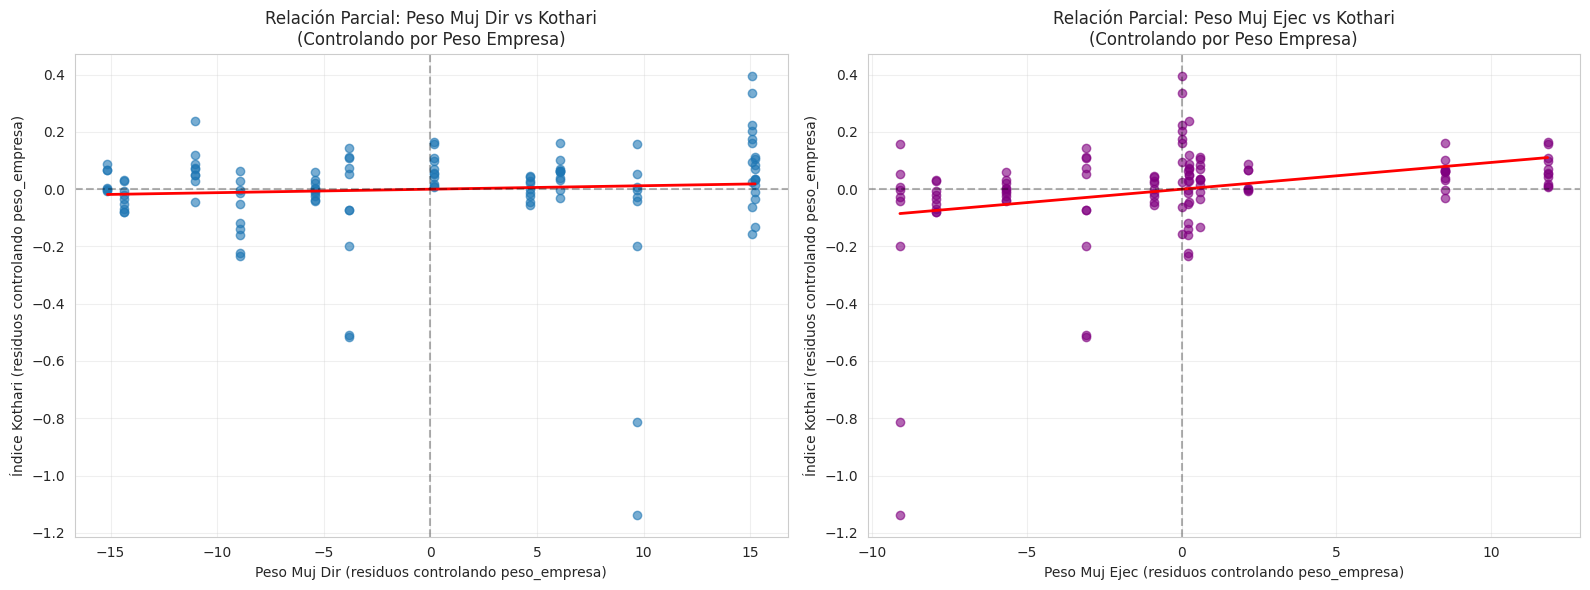

Gráficos de residuos parciales guardados.


In [16]:
# Gráfico de residuos parciales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Residuos parciales para peso_muj_dir
# Calcular residuos de KOTHARI_INDEX después de controlar por peso_empresa
X_empresa = sm.add_constant(df_reg['peso_empresa'])
model_kothari_empresa = sm.OLS(df_reg['KOTHARI_INDEX'], X_empresa).fit()
residuos_kothari = model_kothari_empresa.resid

# Calcular residuos de peso_muj_dir después de controlar por peso_empresa
model_mujdir_empresa = sm.OLS(df_reg['peso_muj_dir'], X_empresa).fit()
residuos_mujdir = model_mujdir_empresa.resid

axes[0].scatter(residuos_mujdir, residuos_kothari, alpha=0.6)
z = np.polyfit(residuos_mujdir, residuos_kothari, 1)
p = np.poly1d(z)
x_line = np.linspace(residuos_mujdir.min(), residuos_mujdir.max(), 100)
axes[0].plot(x_line, p(x_line), "r-", linewidth=2)
axes[0].set_xlabel('Peso Muj Dir (residuos controlando peso_empresa)')
axes[0].set_ylabel('Índice Kothari (residuos controlando peso_empresa)')
axes[0].set_title('Relación Parcial: Peso Muj Dir vs Kothari\n(Controlando por Peso Empresa)')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Residuos parciales para peso_muj_ejec
model_mujejec_empresa = sm.OLS(df_reg['peso_muj_ejec'], X_empresa).fit()
residuos_mujejec = model_mujejec_empresa.resid

axes[1].scatter(residuos_mujejec, residuos_kothari, alpha=0.6, color='purple')
z = np.polyfit(residuos_mujejec, residuos_kothari, 1)
p = np.poly1d(z)
x_line = np.linspace(residuos_mujejec.min(), residuos_mujejec.max(), 100)
axes[1].plot(x_line, p(x_line), "r-", linewidth=2)
axes[1].set_xlabel('Peso Muj Ejec (residuos controlando peso_empresa)')
axes[1].set_ylabel('Índice Kothari (residuos controlando peso_empresa)')
axes[1].set_title('Relación Parcial: Peso Muj Ejec vs Kothari\n(Controlando por Peso Empresa)')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('/home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/docs/source/partial_residuals_gender.png', dpi=100, bbox_inches='tight')
plt.show()

print("Gráficos de residuos parciales guardados.")

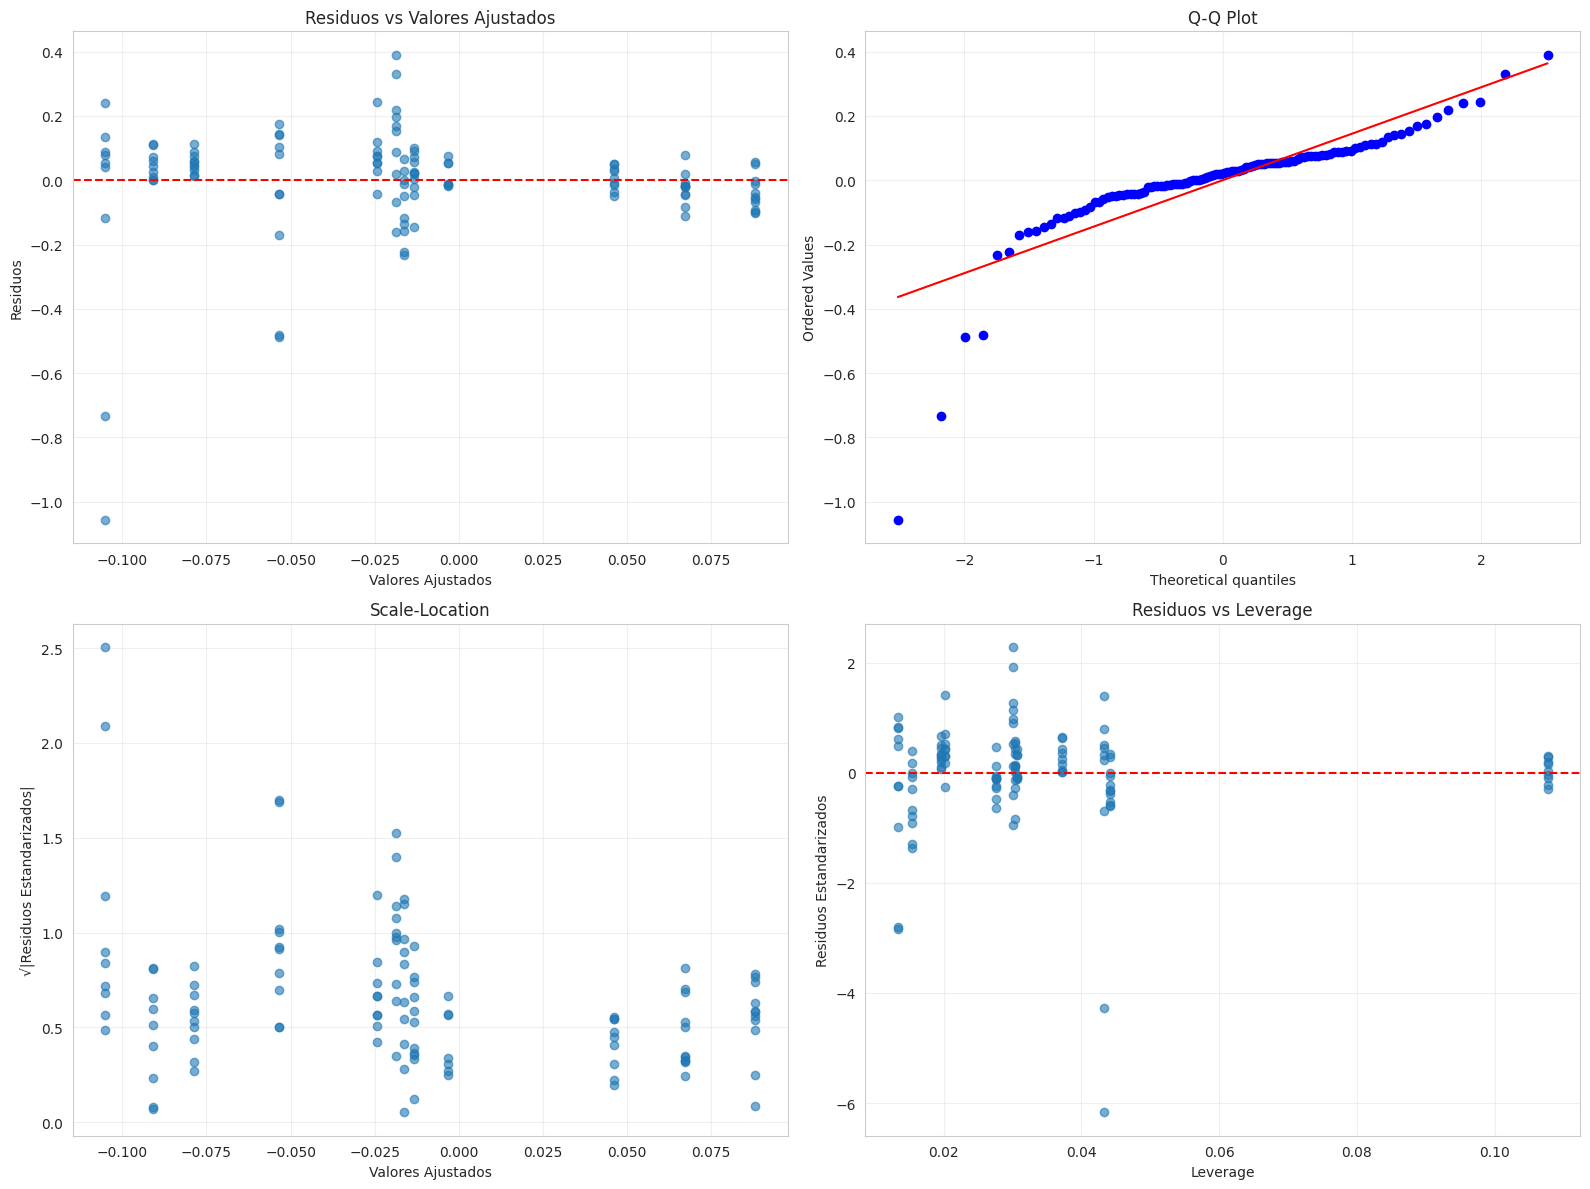

Gráficos de diagnóstico del modelo guardados.


In [17]:
# Gráficos de diagnóstico del modelo completo (Modelo 4)
fig = plt.figure(figsize=(16, 12))

# 1. Residuos vs Valores ajustados
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(model4.fittedvalues, model4.resid, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Valores Ajustados')
ax1.set_ylabel('Residuos')
ax1.set_title('Residuos vs Valores Ajustados')
ax1.grid(True, alpha=0.3)

# 2. Q-Q Plot
ax2 = fig.add_subplot(2, 2, 2)
stats.probplot(model4.resid, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.grid(True, alpha=0.3)

# 3. Scale-Location
ax3 = fig.add_subplot(2, 2, 3)
residuos_std = np.sqrt(np.abs(model4.resid / np.std(model4.resid)))
ax3.scatter(model4.fittedvalues, residuos_std, alpha=0.6)
ax3.set_xlabel('Valores Ajustados')
ax3.set_ylabel('√|Residuos Estandarizados|')
ax3.set_title('Scale-Location')
ax3.grid(True, alpha=0.3)

# 4. Residuos vs Leverage
ax4 = fig.add_subplot(2, 2, 4)
influence = model4.get_influence()
leverage = influence.hat_matrix_diag
ax4.scatter(leverage, model4.resid_pearson, alpha=0.6)
ax4.axhline(y=0, color='r', linestyle='--')
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Residuos Estandarizados')
ax4.set_title('Residuos vs Leverage')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/docs/source/regression_diagnostics_controlled.png', dpi=100, bbox_inches='tight')
plt.show()

print("Gráficos de diagnóstico del modelo guardados.")

## Resumen de Hallazgos

In [18]:
# Crear resumen consolidado
print("\n" + "="*100)
print("RESUMEN DE HALLAZGOS: EFECTO DE GÉNERO CONTROLANDO POR PESO DE EMPRESA")
print("="*100)

print("\n1. CORRELACIONES PARCIALES:")
display(df_corr_parciales)

print("\n2. COMPARACIÓN DE MODELOS:")
display(comparacion_modelos)

print("\n3. SIGNIFICANCIA DE VARIABLES EN MODELO COMPLETO (Modelo 4):")
coef_summary = pd.DataFrame({
    'Variable': ['Intercepto', 'peso_empresa', 'peso_muj_dir', 'peso_muj_ejec'],
    'Coeficiente': model4.params.values,
    'Error Estándar': model4.bse.values,
    'T-statistic': model4.tvalues.values,
    'P-value': model4.pvalues.values,
    'Significancia': ['Sí' if p < 0.05 else 'No' for p in model4.pvalues.values]
})
display(coef_summary)

print("\n" + "="*100)
print("\nCONCLUSIÓN:")
print("-" * 100)

if all(p >= 0.05 for p in df_corr_parciales['P-value']):
    print("Las variables de género (peso_muj_dir y peso_muj_ejec) NO muestran una relación")
    print("estadísticamente significativa con el Índice de Kothari cuando se controla por")
    print("el peso de empresa. Esto sugiere que el efecto observado del peso de empresa")
    print("no está mediado por la representación de mujeres en posiciones de liderazgo.")
else:
    print("Al menos una variable de género muestra una relación estadísticamente significativa")
    print("con el Índice de Kothari, incluso después de controlar por el peso de empresa.")
    
print("\n" + "="*100)


RESUMEN DE HALLAZGOS: EFECTO DE GÉNERO CONTROLANDO POR PESO DE EMPRESA

1. CORRELACIONES PARCIALES:


,Variable,Correlación Parcial,P-value,N,Significancia
0,peso_muj_dir,0.069941,0.455644,116,No
1,peso_muj_ejec,0.051801,0.533209,147,No



2. COMPARACIÓN DE MODELOS:


,Modelo,R²,R² Ajustado,AIC,BIC,F-statistic,P-value
0,Modelo 1: peso_empresa,0.012535,0.003873,-68.234682,-62.727502,1.447103,0.231486
1,Modelo 2: + peso_muj_dir,0.017365,-0.000027,-66.803510,-58.542739,0.998469,0.371670
2,Modelo 3: + peso_muj_ejec,0.109814,0.094059,-78.265150,-70.004379,6.969886,0.001398
3,Modelo 4: + ambas variables género,0.110356,0.086526,-76.335755,-65.321394,4.631005,0.004315



3. SIGNIFICANCIA DE VARIABLES EN MODELO COMPLETO (Modelo 4):


,Variable,Coeficiente,Error Estándar,T-statistic,P-value,Significancia
0,Intercepto,-0.118613,0.041411,-2.864309,0.004991,Sí
1,peso_empresa,0.003360,0.001594,2.107644,0.037293,Sí
2,peso_muj_dir,0.000412,0.001576,0.261135,0.794468,No
3,peso_muj_ejec,0.009237,0.002700,3.421530,0.000870,Sí




CONCLUSIÓN:
----------------------------------------------------------------------------------------------------
Las variables de género (peso_muj_dir y peso_muj_ejec) NO muestran una relación
estadísticamente significativa con el Índice de Kothari cuando se controla por
el peso de empresa. Esto sugiere que el efecto observado del peso de empresa
no está mediado por la representación de mujeres en posiciones de liderazgo.



## Exportar resultados a markdown

In [19]:
# Exportar los resultados a un archivo markdown
output_path = "/home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/docs/source/note_05_Gender_Weight_Analysis_Controlled.md"

with open(output_path, "w", encoding="utf-8") as f:
    f.write("# Análisis de Relación entre Pesos de Género y Índice de Kothari (Controlado)\n\n")
    f.write("<!-- Este archivo documenta el análisis de diferencias significativas entre variables de género y el índice de devengos discrecionales, controlando por el efecto del peso de empresa. -->\n\n")
    f.write("**Fuente:** notebooks/05_Gender_Weight_Analysis_Controlled.ipynb\n\n")
    
    f.write("## Objetivo\n\n")
    f.write("Analizar si existen diferencias significativas en la representación de mujeres en directorios y ejecutivos con respecto al índice de devengos discrecionales de Kothari, **controlando por el efecto del peso de empresa**.\n\n")
    f.write("En el análisis anterior (notebook 04), se encontró que el peso de empresa tiene un efecto significativo según la correlación de Spearman (ρ = -0.187, p = 0.019). Este análisis busca determinar si las variables de género tienen un efecto independiente.\n\n")
    
    f.write("## Variables Analizadas\n\n")
    f.write("- **peso_empresa**: Peso relativo de la empresa según activos totales (%) - *Variable de control*\n")
    f.write("- **peso_muj_dir**: Porcentaje de mujeres en directorios - *Variable independiente*\n")
    f.write("- **peso_muj_ejec**: Porcentaje de mujeres en ejecutivos - *Variable independiente*\n")
    f.write("- **KOTHARI_INDEX**: Índice de devengos discrecionales (residuos de la regresión de Kothari) - *Variable dependiente*\n\n")
    
    f.write("## Multicolinealidad\n\n")
    f.write("### Factor de Inflación de Varianza (VIF)\n\n")
    f.write("| Variable | VIF |\n")
    f.write("|----------|-----|\n")
    for _, row in vif_data.iterrows():
        f.write(f"| {row['Variable']} | {row['VIF']:.3f} |\n")
    f.write("\n*Interpretación: VIF < 5 indica que no hay problemas de multicolinealidad.*\n\n")
    
    f.write("## Correlaciones Parciales\n\n")
    f.write("Correlaciones entre variables de género y el Índice de Kothari, controlando por peso de empresa:\n\n")
    f.write("| Variable | Correlación Parcial | P-value | N | Significancia (α=0.05) |\n")
    f.write("|----------|---------------------|---------|---|------------------------|\n")
    for _, row in df_corr_parciales.iterrows():
        f.write(f"| {row['Variable']} | {row['Correlación Parcial']:.6f} | {row['P-value']:.6f} | {row['N']} | {row['Significancia']} |\n")
    
    f.write("\n## Modelos de Regresión Lineal Múltiple\n\n")
    f.write("### Comparación de Modelos\n\n")
    f.write("| Modelo | R² | R² Ajustado | AIC | BIC | F-statistic | P-value |\n")
    f.write("|--------|-----|-------------|-----|-----|-------------|---------|\n")
    for _, row in comparacion_modelos.iterrows():
        f.write(f"| {row['Modelo']} | {row['R²']:.6f} | {row['R² Ajustado']:.6f} | {row['AIC']:.2f} | {row['BIC']:.2f} | {row['F-statistic']:.4f} | {row['P-value']:.6f} |\n")
    
    f.write("\n### Coeficientes del Modelo Completo (Modelo 4)\n\n")
    f.write("| Variable | Coeficiente | Error Estándar | T-statistic | P-value | Significancia |\n")
    f.write("|----------|-------------|----------------|-------------|---------|---------------|\n")
    for _, row in coef_summary.iterrows():
        f.write(f"| {row['Variable']} | {row['Coeficiente']:.6f} | {row['Error Estándar']:.6f} | {row['T-statistic']:.4f} | {row['P-value']:.6f} | {row['Significancia']} |\n")
    
    f.write("\n### Tests F para Modelos Anidados\n\n")
    f.write("| Comparación | F-statistic | P-value | ¿Mejora significativa? |\n")
    f.write("|-------------|-------------|---------|------------------------|\n")
    f.write(f"| Modelo 2 vs Modelo 1 | {f_stat_2_1:.6f} | {p_val_2_1:.6f} | {'Sí' if p_val_2_1 < 0.05 else 'No'} |\n")
    f.write(f"| Modelo 3 vs Modelo 1 | {f_stat_3_1:.6f} | {p_val_3_1:.6f} | {'Sí' if p_val_3_1 < 0.05 else 'No'} |\n")
    f.write(f"| Modelo 4 vs Modelo 1 | {f_stat_4_1:.6f} | {p_val_4_1:.6f} | {'Sí' if p_val_4_1 < 0.05 else 'No'} |\n")
    
    f.write("\n## Interpretación\n\n")
    f.write("### Correlaciones Parciales\n\n")
    f.write("Las correlaciones parciales miden la relación entre cada variable de género y el Índice de Kothari después de eliminar el efecto del peso de empresa en ambas variables.\n\n")
    
    f.write("### Modelos de Regresión\n\n")
    f.write("- **Modelo 1** establece la línea base con solo el peso de empresa.\n")
    f.write("- **Modelos 2 y 3** evalúan si agregar cada variable de género mejora la predicción.\n")
    f.write("- **Modelo 4** incluye todas las variables para evaluar el efecto conjunto.\n\n")
    
    f.write("### Criterios de Ajuste\n\n")
    f.write("- **R²**: Proporción de varianza explicada (mayor es mejor).\n")
    f.write("- **R² Ajustado**: R² ajustado por el número de variables (penaliza complejidad).\n")
    f.write("- **AIC/BIC**: Criterios de información (menor es mejor, penalizan sobreajuste).\n\n")
    
    f.write("## Conclusión\n\n")
    if all(p >= 0.05 for p in df_corr_parciales['P-value']):
        f.write("Los resultados muestran que **las variables de género no tienen un efecto estadísticamente significativo** sobre el Índice de Kothari cuando se controla por el peso de empresa. ")
        f.write("Esto sugiere que el efecto del tamaño de la empresa (peso_empresa) no está mediado ni modificado por la representación de mujeres en posiciones de liderazgo.\n\n")
        f.write("La ausencia de significancia en las correlaciones parciales y en los coeficientes de regresión indica que, una vez controlado el tamaño empresarial, ")
        f.write("la proporción de mujeres en directorios y ejecutivos no aporta información adicional significativa para explicar la variabilidad en los devengos discrecionales.\n")
    else:
        f.write("Los resultados muestran que **al menos una variable de género tiene un efecto estadísticamente significativo** sobre el Índice de Kothari, ")
        f.write("incluso después de controlar por el peso de empresa. Esto sugiere que la representación de mujeres en posiciones de liderazgo ")
        f.write("tiene un efecto independiente sobre los devengos discrecionales.\n")
    
    f.write("\n*Generado automáticamente desde el notebook.*\n")

print(f"Resumen guardado en: {output_path}")

Resumen guardado en: /home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/docs/source/note_05_Gender_Weight_Analysis_Controlled.md
